# Import required modules and load data file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fruit_data_with_colors.txt', sep='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [4]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
lookup_fruit_name = dict(zip(df['fruit_label'].unique(), df['fruit_name'].unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

# Examining / Visualizing the Data

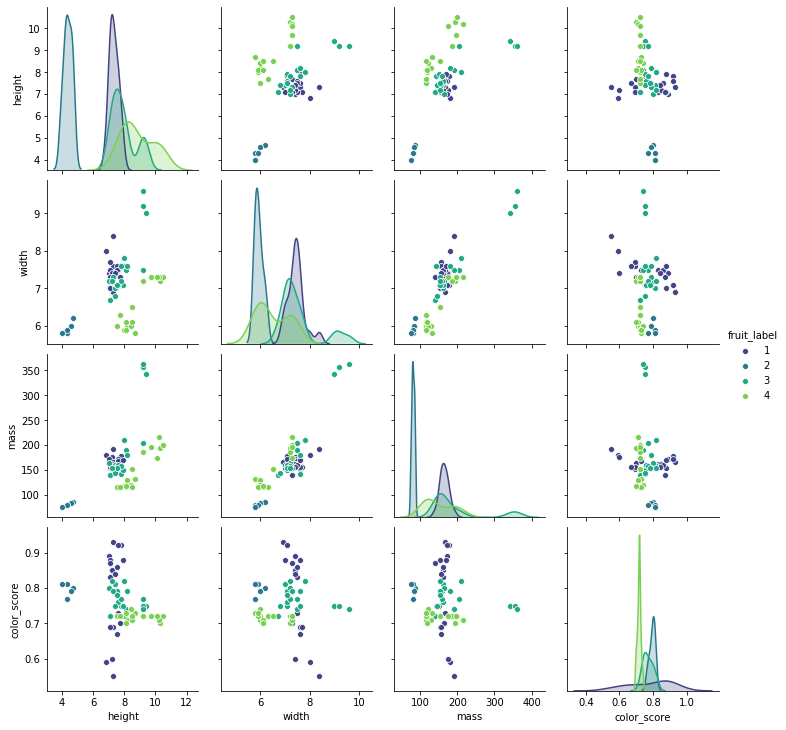

In [6]:
fruits = df[['height','width', 'mass', 'color_score', 'fruit_label']]
sns.pairplot(fruits, hue='fruit_label', palette='viridis')

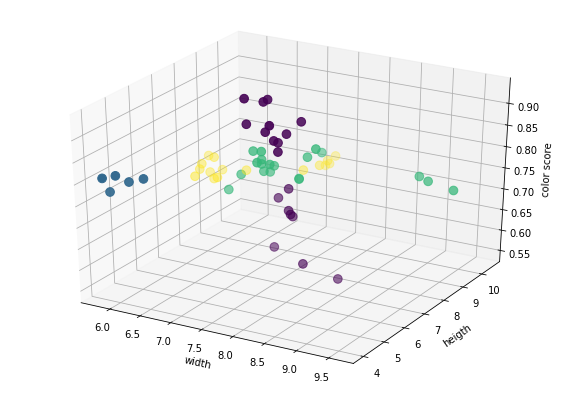

In [7]:
from mpl_toolkits.mplot3d import Axes3D

figure = plt.figure(figsize=(10,7))
ax = plt.subplot(projection='3d')

ax.scatter(fruits['width'], fruits['height'], fruits['color_score'], c=fruits['fruit_label'], s=75)
ax.set_xlabel('width')
ax.set_ylabel('heigth')
ax.set_zlabel('color score');




# Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from adspy_shared_utilities import plot_fruit_knn


In [9]:
X = df.iloc[:,3:6]
y = df.iloc[:,0]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
X_test.shape, X_train.shape, y_train.shape

((15, 3), (44, 3), (44,))

# Classifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [14]:
pred = knn.predict(X_test)

# Estimate the accuracy of the classifier

In [15]:
np.mean(pred == y_test)

0.5333333333333333

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       1.00      1.00      1.00         2
           3       0.38      0.75      0.50         4
           4       1.00      0.60      0.75         5

    accuracy                           0.53        15
   macro avg       0.59      0.59      0.56        15
weighted avg       0.57      0.53      0.52        15



# Use the trained k-NN classifier model to classify new, previously unseen objects

In [17]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [18]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

# Plot the decision boundaries of the k-NN classifier

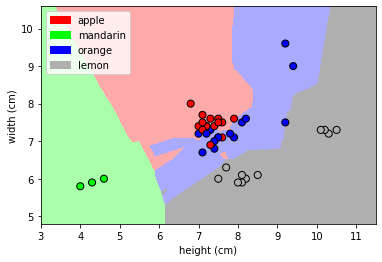

In [19]:
plot_fruit_knn(X_train, y_train, 5, 'uniform') # we choose 5 nearest neighbors

# How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

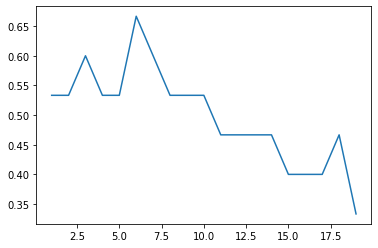

In [20]:
score = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
#     pred = knn.predict(X_test)
    s = knn.score(X_test, y_test)
    score.append(s)
    
plt.plot(range(1,20) , score);

# How sensitive is k-NN classification accuracy to the train/test split proportion?

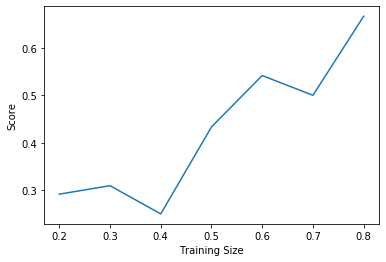

In [23]:
knn = KNeighborsClassifier(6)
score = []
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
for i in t:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-i, random_state=42)
    
    s = []
    for j in range(1,10):
        
        knn.fit(X_train, y_train)
        s.append(knn.score(X_test, y_test))
   
    score.append(np.mean(s))

plt.plot( t,score )
plt.xlabel('Training Size')
plt.ylabel('Score');

        